In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

# we will have 2 different target variables 
dummies = pd.get_dummies(df['species'], drop_first=True)

df = pd.concat([df, dummies], axis=1).drop(columns=['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
1,5.1,3.5,1.4,0.2,0,0
2,4.9,3.0,1.4,0.2,0,0
3,4.7,3.2,1.3,0.2,0,0
4,4.6,3.1,1.5,0.2,0,0
5,5.0,3.6,1.4,0.2,0,0


# Train Validate Test

In [2]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [3]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='versicolor', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['versicolor'])
y_train = train.versicolor

X_validate = validate.drop(columns=['versicolor'])
y_validate = validate.versicolor

X_test = test.drop(columns=['versicolor'])
y_test = test.versicolor

# Model 1

## Make the Model

### Create the object

In [4]:
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

### Fit the model

In [5]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

### Feature Importance

In [6]:
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

Coefficient: 
 [[-0.42681384 -2.98522269  1.96274678  0.08740801 -7.98399654]]
Intercept: 
 [7.80358914]


### Make Predictions

In [7]:
y_pred = logit.predict(X_train)

### Estimate Probability

In [8]:
y_pred_proba = logit.predict_proba(X_train)

## Evaluate Model

### Compute the Accuracy

In [9]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.95


### Create a confusion matrix

In [10]:
print(confusion_matrix(y_train, y_pred))

[[52  4]
 [ 0 28]]


### Create a classificaiton report

In [11]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        56
           1       0.88      1.00      0.93        28

    accuracy                           0.95        84
   macro avg       0.94      0.96      0.95        84
weighted avg       0.96      0.95      0.95        84



# Model 2

## Make the Model

### Create the object

In [12]:
logit2 = LogisticRegression(C=.1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')
## for this model we adjust the 'C' parameted from 1 to .1

### Fit the model

In [13]:
logit2.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 99}, random_state=123)

### Feature Importance

In [14]:
print('Coefficient: \n', logit2.coef_)
print('Intercept: \n', logit2.intercept_)

Coefficient: 
 [[-0.19445819 -1.61580992  1.05115027 -0.16751972 -2.52871891]]
Intercept: 
 [5.55477327]


### Make Predictions

In [15]:
y_pred2 = logit2.predict(X_train)

### Estimate Probability

In [16]:
y_pred_proba2 = logit2.predict_proba(X_train)

## Evaluate Model

### Compute the Accuracy

In [17]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.42


### Create a confusion matrix

In [18]:
print(confusion_matrix(y_train, y_pred2))

[[ 7 49]
 [ 0 28]]


### Create a classificaiton report

In [19]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.12      0.22        56
           1       0.36      1.00      0.53        28

    accuracy                           0.42        84
   macro avg       0.68      0.56      0.38        84
weighted avg       0.79      0.42      0.33        84



# Validate Models

## Evaluate on Out-of-Sample data

In [20]:
# make predictions

y_pred1 = logit.predict(X_validate)
y_pred2 = logit2.predict(X_validate)


print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(logit.score(X_validate, y_validate)))

# confusion matrix of model 1
print(confusion_matrix(y_validate, y_pred1))

# classification report of model 1
print(classification_report(y_validate, y_pred1))

print("Model 2: solver = lbfgs, c = .1")

# accuracy of model 2
print('Accuracy: {:.2f}'.format(logit2.score(X_validate, y_validate)))

# confusion matrix of model 2
print(confusion_matrix(y_validate, y_pred2))

# classification report of model 2
print(classification_report(y_validate, y_pred2))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.94
[[22  2]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.86      1.00      0.92        12

    accuracy                           0.94        36
   macro avg       0.93      0.96      0.94        36
weighted avg       0.95      0.94      0.95        36

Model 2: solver = lbfgs, c = .1
Accuracy: 0.33
[[ 0 24]
 [ 0 12]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.33      1.00      0.50        12

    accuracy                           0.33        36
   macro avg       0.17      0.50      0.25        36
weighted avg       0.11      0.33      0.17        36



# Test Model

In [21]:
y_pred = logit.predict(X_test)
y_pred_proba = logit.predict_proba(X_test)

print("Model 1: solver = lbfgs, c = 1")

print('Accuracy: {:.2f}'.format(logit.score(X_test, y_test)))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.87
[[16  4]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30



# Visualize Model

In [22]:
# create array of probabilities of being versicolor (versicolor == 1)

y_pred_proba = np.array([i[1] for i in y_pred_proba])

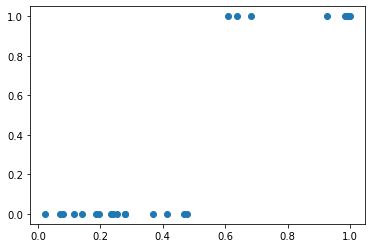

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred)